Please see the description of these codes in readme.txt

1.Data processing

In [1]:
import numpy as np
from  user import *
from  item import *
from surprise import SVD, NMF, accuracy,SVDpp
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
import pandas as pd
from functions import *
from user_based_Recommendor import *
from item_based_Recommendor import *
from Community_Detection import *
from Simple_Matrix_Factorization import *

In [2]:
#there are 943 users and 1682 items
user_item_matrix=np.full((943+1,1682+1),-1) #each row represents a user and each col represents a item, user_item_matrix[i][j]=user i's rating of item j
file = open('ml-100k/u.data', 'r')
Lines = file.readlines()
for line in Lines:
    splits=line.strip().split('\t')
    user_id=int(splits[0])
    item_id=int(splits[1])
    rating=int(splits[2])

    user_item_matrix[user_id][item_id]=rating

In [3]:
#there are 943 users and 1682 items
item_user_matrix=np.full((1682+1,943+1),-1) #each row represents a user and each col represents a item, user_item_matrix[i][j]=user i's rating of item j
file = open('ml-100k/u.data', 'r')
Lines = file.readlines()
for line in Lines:
    splits=line.strip().split('\t')
    user_id=int(splits[0])
    item_id=int(splits[1])
    rating=int(splits[2])

    item_user_matrix[item_id][user_id]=rating

In [4]:
user_dict={}
file = open('ml-100k/u.user', 'r')
Lines = file.readlines()
for line in Lines:
    splits=line.strip().split('|')
    user_id=splits[0]

    new_user=user(user_id,splits[1],splits[2],splits[3],splits[4])#id,age,gender,occupation,zip_code
    user_dict[user_id]=new_user


In [5]:
print(user_dict['1'].printUserInfor())

User id =1, age=24, gender=M, occupation=technician, zip code=85711
None


In [6]:
item_dict={}
file = open('ml-100k/u.item', 'r',encoding="ISO-8859-1")
Lines = file.readlines()
for line in Lines:
    splits=line.strip().split('|')#1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
    movie_id=splits[0]
    new_movie=movie(item_id,splits[1],splits[2],splits[3],splits[4],getTypes(line[-38:]))
    item_dict[movie_id]=new_movie

In [7]:
print(item_dict['1'].printMovieInfor())

movie id=203
movie title=Toy Story (1995)
release date=01-Jan-1995
video release date=
IMDB URL=http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)
type=Animation,Children's,Comedy
None


2.Community Detection

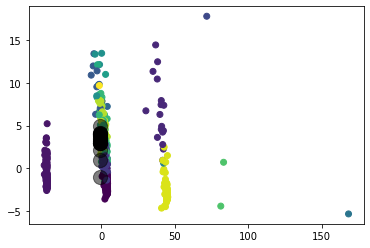

In [8]:
user_item_matrix=np.full((943+1,1682+1),-1) #each row represents a user and each col represents a item, user_item_matrix[i][j]=user i's rating of item j
file = open('ml-100k/u.data', 'r')
Lines = file.readlines()
for line in Lines:
    splits=line.strip().split('\t')
    user_id=int(splits[0])
    item_id=int(splits[1])
    rating=int(splits[2])

    user_item_matrix[user_id][item_id]=rating


ConmmunityDetection(user_item_matrix,19)

3.User-based model, item-based model

In [ ]:
neighbor_size=[12,15]
for n in neighbor_size:
    print("n="+str(n))
    user_based_Model_Test(user_item_matrix,n)

In [ ]:
print(item_user_matrix.shape)

In [9]:
neighbor_size=[12,15]
for n in neighbor_size:
    print("n="+str(n))
    user_based_Model_Test(user_item_matrix,n)

n=12
100%|██████████| 943/943 [2:38:54<00:00, 10.11s/it]
RMSE=0.5213614758052462
n=15
100%|██████████| 943/943 [2:39:10<00:00, 10.13s/it]
RMSE=0.5220310790722416


In [11]:
neighbor_size=[3,6,9,12,15]
for n in neighbor_size:
    print("n="+str(n))
    item_based_Model_Test(item_user_matrix,n)

n=3
100%|██████████| 1682/1682 [4:10:44<00:00,  8.94s/it]
RMSE=0.7671653410476503
n=6
100%|██████████| 1682/1682 [4:11:27<00:00,  8.97s/it]
RMSE=0.7152675123945486
n=9
100%|██████████| 1682/1682 [4:10:34<00:00,  8.94s/it]
RMSE=0.6909575927315788
n=12
100%|██████████| 1682/1682 [4:12:06<00:00,  8.99s/it]
RMSE=0.6748163870460543
n=15
100%|██████████| 1682/1682 [4:11:56<00:00,  8.99s/it]
RMSE=0.6626875490693789


4. Data processing and train, test split

In [3]:
def load_movies_dataset() -> pd.DataFrame:
    movie_data_columns = [
    'movie_id', 'title', 'release_date', 'video_release_date', 'url',
    'unknown', 'Action', 'Adventure', 'Animation', "Children's",
    'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
    'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
    'War', 'Western'
    ]

    movie_data = pd.read_csv(
        'datasets/ml-100k/u.item', 
        sep = '|', 
        encoding = "ISO-8859-1", 
        header = None, 
        names = movie_data_columns,
        index_col = 'movie_id'
    )
    movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])
    return movie_data

def load_ratings() -> pd.DataFrame:
    ratings_data = pd.read_csv(
        'ml-100k/u.data',
        sep = '\t',
        encoding = "ISO-8859-1",
        header = None,
        names=['user_id', 'movie_id', 'rating', 'timestamp']
    )
    
    return ratings_data[['user_id', 'movie_id', 'rating']]

In [4]:
ratings_data = load_ratings()
ratings_data.head(10)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [5]:
min_rating, max_rating = ratings_data['rating'].min(), ratings_data['rating'].max()

reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings_data, reader)
trainset, testset = train_test_split(data, test_size=.25)

6.SVD

In [13]:
n_factors=[20,40,60,80,100]
for f in n_factors:
    print("f="+str(f))
    model = SVD(n_factors=f, biased=False)
    model.fit(trainset)

    # Let's calculate the RMSE
    predictions = model.test(testset)
    accuracy.rmse(predictions)

f=20
RMSE: 0.9437
f=40
RMSE: 0.9430
f=60
RMSE: 0.9462
f=80
RMSE: 0.9464
f=100
RMSE: 0.9526


7.SVD++

Epoch num=20, learning rate=0.005, n_Factors denotes the dimension of latent feature vector

In [17]:
n_factors=[20,40,60,80,100]
for f in n_factors:
    model = SVDpp(n_factors=f)
    model.fit(trainset)

    predictions = model.test(testset)
    accuracy.rmse(predictions)

RMSE: 0.9185
RMSE: 0.9234
RMSE: 0.9242
RMSE: 0.9290
RMSE: 0.9294


8.Matrix Factorization

In [7]:
#each row represents a user and each col represents a item, user_item_matrix[i][j]=user i's rating of item j
file = open('ml-100k/u.data', 'r')
Lines = file.readlines()
train=[]
test=[]
cnt=0
for line in Lines:
    splits=line.strip().split('\t')
    user_id=int(splits[0])
    item_id=int(splits[1])
    rating=int(splits[2])
    if cnt<100000*0.75:
        train.append([user_id,item_id,rating])
    else:
        test.append([user_id,item_id,rating])
    cnt+=1


In [8]:
print(len(train))
print(len(test))

75000
25000


In [9]:
def SimpleMatrixFactorization(K,step_num,train,test,initialize_val,lr_rate):
    print("Dimension of latent feature vector has dimension k="+str(K))
    #data pre-processing
    train_R_matrix=np.full((943,1682),initialize_val)
    for each in train:
        i=each[0]-1
        j=each[1]-1
        rating=each[2]
        train_R_matrix[i][j]=rating

    if Initilize_val==-1:
        user_avg_rating_dict={}
        for each in train:
            i=each[0]-1
            j=each[1]-1
            rating=each[2]
            
            if i not in user_avg_rating_dict:
                v=[rating]
                user_avg_rating_dict[i]=v
            else:     
                v=user_avg_rating_dict[i]       
                v.append(rating)  
                user_avg_rating_dict[i]=v
            
        for each in user_avg_rating_dict:
            v=user_avg_rating_dict[each]
            user_avg_rating_dict[each]=np.average(v)

        train_R_matrix=np.full((943,1682),-1)
        for each in train:
            i=each[0]-1
            j=each[1]-1
            rating=each[2]
            train_R_matrix[i][j]=rating
        for i in range(train_R_matrix.shape[0]):
            for j in range(train_R_matrix.shape[1]):
                if train_R_matrix[i][j]==-1:
                    train_R_matrix[i][j]=user_avg_rating_dict[i]

    row = train_R_matrix.shape[0]
    col = train_R_matrix.shape[1]
    K = 2

    P = numpy.random.rand(row,K)
    Q = numpy.random.rand(col,K)

    #Train Model
    P, Q = matrix_factorization(train_R_matrix, P, Q, K,steps=step_num,alpha=lr_rate)
    approximated_R = numpy.dot(P, Q.T)

    #test model
    truth=[]
    pred=[]
    for each in test:
        i=each[0]-1
        j=each[1]-1
        rating=each[2]
        truth.append(rating)
        pred.append(approximated_R[i][j])
    print("RMSE="+str(RootMeanSquareError(truth,pred)))
    print("")

8.1 Initilize missing value to be 0

In [10]:
K=[20,40,60,80,100]
epoch_num=20
lr_rate=0.005
Initilize_val=0
for k in K: 
    SimpleMatrixFactorization(k,epoch_num,train,test,Initilize_val,lr_rate)

Dimension of latent feature vector has dimension k=20
RMSE=0.9535874363022269

Dimension of latent feature vector has dimension k=40
RMSE=0.9667566164845994

Dimension of latent feature vector has dimension k=60
RMSE=0.9456386514468048

Dimension of latent feature vector has dimension k=80
RMSE=0.950836182794437

Dimension of latent feature vector has dimension k=100
RMSE=0.964797332626255



8.2 Initialize the missing value to be global mean of trainset data

In [11]:
K=[20,40,60,80,100]
epoch_num=20
lr_rate=0.005
Initilize_val=trainset.global_mean
for k in K: 
    SimpleMatrixFactorization(k,epoch_num,train,test,Initilize_val,lr_rate)

Dimension of latent feature vector has dimension k=20
RMSE=1.1059409543385637

Dimension of latent feature vector has dimension k=40
RMSE=1.1011063707480075

Dimension of latent feature vector has dimension k=60
RMSE=1.1032298673168757

Dimension of latent feature vector has dimension k=80
RMSE=1.1067183727867962

Dimension of latent feature vector has dimension k=100
RMSE=1.0974940180313981



8.3 Initilize the missing value of user i to be the average rating of the obersed data of each user i

In [12]:
K=[20,40,60,80,100]
epoch_num=20
lr_rate=0.005
Initilize_val=-1
for k in K: 
    SimpleMatrixFactorization(k,epoch_num,train,test,Initilize_val,lr_rate)

Dimension of latent feature vector has dimension k=20
RMSE=1.137006408862883

Dimension of latent feature vector has dimension k=40
RMSE=1.1338169257084085

Dimension of latent feature vector has dimension k=60
RMSE=1.1394469119828747

Dimension of latent feature vector has dimension k=80
RMSE=1.1341344873404966

Dimension of latent feature vector has dimension k=100
RMSE=1.1338015594323076

